In [1]:
import concurrent.futures as cf
import zipfile
import collections
import zarr
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
import humanfriendly
import os
import sys
from pathlib import Path

ZIP_FILE = "viridian_mafft_2024-10-14_v1.vcz.zip"
DATA_WORK_DIR="viridian_data/alignments/data"

In [2]:
!ls -lh {ZIP_FILE}

-rw-r--r-- 1 jk jk 401M Feb  6 13:36 viridian_mafft_2024-10-14_v1.vcz.zip


In [3]:
!du -sch {DATA_WORK_DIR}/batch1.extracted/*.fa {DATA_WORK_DIR}/batch2.extracted/*.fa 

2.8G	viridian_data/alignments/data/batch1.extracted/10.fa
2.8G	viridian_data/alignments/data/batch1.extracted/11.fa
2.8G	viridian_data/alignments/data/batch1.extracted/12.fa
2.8G	viridian_data/alignments/data/batch1.extracted/13.fa
2.8G	viridian_data/alignments/data/batch1.extracted/14.fa
2.8G	viridian_data/alignments/data/batch1.extracted/15.fa
2.8G	viridian_data/alignments/data/batch1.extracted/16.fa
2.8G	viridian_data/alignments/data/batch1.extracted/17.fa
2.8G	viridian_data/alignments/data/batch1.extracted/18.fa
2.8G	viridian_data/alignments/data/batch1.extracted/19.fa
2.8G	viridian_data/alignments/data/batch1.extracted/1.fa
2.8G	viridian_data/alignments/data/batch1.extracted/20.fa
2.8G	viridian_data/alignments/data/batch1.extracted/21.fa
2.8G	viridian_data/alignments/data/batch1.extracted/22.fa
2.8G	viridian_data/alignments/data/batch1.extracted/23.fa
2.8G	viridian_data/alignments/data/batch1.extracted/24.fa
2.8G	viridian_data/alignments/data/batch1.extracted/25.fa
2.8G	viridian_d

In [31]:
!du -sch {DATA_WORK_DIR}/batch1.extracted/*.fa.xz {DATA_WORK_DIR}/batch2.extracted/*.fa.xz

5.3M	viridian_data/alignments/data/batch1.extracted/10.cons.fa.xz
4.9M	viridian_data/alignments/data/batch1.extracted/11.cons.fa.xz
5.4M	viridian_data/alignments/data/batch1.extracted/12.cons.fa.xz
4.9M	viridian_data/alignments/data/batch1.extracted/13.cons.fa.xz
4.3M	viridian_data/alignments/data/batch1.extracted/14.cons.fa.xz
5.0M	viridian_data/alignments/data/batch1.extracted/15.cons.fa.xz
5.1M	viridian_data/alignments/data/batch1.extracted/16.cons.fa.xz
5.1M	viridian_data/alignments/data/batch1.extracted/17.cons.fa.xz
5.2M	viridian_data/alignments/data/batch1.extracted/18.cons.fa.xz
5.3M	viridian_data/alignments/data/batch1.extracted/19.cons.fa.xz
3.2M	viridian_data/alignments/data/batch1.extracted/1.cons.fa.xz
5.4M	viridian_data/alignments/data/batch1.extracted/20.cons.fa.xz
5.4M	viridian_data/alignments/data/batch1.extracted/21.cons.fa.xz
5.9M	viridian_data/alignments/data/batch1.extracted/22.cons.fa.xz
6.1M	viridian_data/alignments/data/batch1.extracted/23.cons.fa.xz
5.9M	viridi

In [11]:
!du -sch {DATA_WORK_DIR}/batch1.aln/*.aln {DATA_WORK_DIR}/batch2.aln/*.aln 

2.9G	viridian_data/alignments/data/batch1.aln/10.aln
2.9G	viridian_data/alignments/data/batch1.aln/11.aln
2.9G	viridian_data/alignments/data/batch1.aln/12.aln
2.9G	viridian_data/alignments/data/batch1.aln/13.aln
2.9G	viridian_data/alignments/data/batch1.aln/14.aln
2.9G	viridian_data/alignments/data/batch1.aln/15.aln
2.9G	viridian_data/alignments/data/batch1.aln/16.aln
2.9G	viridian_data/alignments/data/batch1.aln/17.aln
2.9G	viridian_data/alignments/data/batch1.aln/18.aln
2.9G	viridian_data/alignments/data/batch1.aln/19.aln
2.9G	viridian_data/alignments/data/batch1.aln/1.aln
2.9G	viridian_data/alignments/data/batch1.aln/20.aln
2.9G	viridian_data/alignments/data/batch1.aln/21.aln
2.9G	viridian_data/alignments/data/batch1.aln/22.aln
2.9G	viridian_data/alignments/data/batch1.aln/23.aln
2.9G	viridian_data/alignments/data/batch1.aln/24.aln
2.9G	viridian_data/alignments/data/batch1.aln/25.aln
2.9G	viridian_data/alignments/data/batch1.aln/26.aln
2.9G	viridian_data/alignments/data/batch1.aln/2

In [12]:
!du -sch {DATA_WORK_DIR}/batch1.aln/*.aln.bgz {DATA_WORK_DIR}/batch2.aln/*.aln.bgz

504M	viridian_data/alignments/data/batch1.aln/10.aln.bgz
503M	viridian_data/alignments/data/batch1.aln/11.aln.bgz
505M	viridian_data/alignments/data/batch1.aln/12.aln.bgz
506M	viridian_data/alignments/data/batch1.aln/13.aln.bgz
502M	viridian_data/alignments/data/batch1.aln/14.aln.bgz
503M	viridian_data/alignments/data/batch1.aln/15.aln.bgz
503M	viridian_data/alignments/data/batch1.aln/16.aln.bgz
503M	viridian_data/alignments/data/batch1.aln/17.aln.bgz
503M	viridian_data/alignments/data/batch1.aln/18.aln.bgz
503M	viridian_data/alignments/data/batch1.aln/19.aln.bgz
502M	viridian_data/alignments/data/batch1.aln/1.aln.bgz
503M	viridian_data/alignments/data/batch1.aln/20.aln.bgz
503M	viridian_data/alignments/data/batch1.aln/21.aln.bgz
504M	viridian_data/alignments/data/batch1.aln/22.aln.bgz
504M	viridian_data/alignments/data/batch1.aln/23.aln.bgz
505M	viridian_data/alignments/data/batch1.aln/24.aln.bgz
505M	viridian_data/alignments/data/batch1.aln/25.aln.bgz
505M	viridian_data/alignments/da

In [15]:
!du -sc {DATA_WORK_DIR}/batch1.aln/*.aln.bgz {DATA_WORK_DIR}/batch2.aln/*.aln.bgz

516028	viridian_data/alignments/data/batch1.aln/10.aln.bgz
514748	viridian_data/alignments/data/batch1.aln/11.aln.bgz
516704	viridian_data/alignments/data/batch1.aln/12.aln.bgz
517568	viridian_data/alignments/data/batch1.aln/13.aln.bgz
513548	viridian_data/alignments/data/batch1.aln/14.aln.bgz
514356	viridian_data/alignments/data/batch1.aln/15.aln.bgz
514964	viridian_data/alignments/data/batch1.aln/16.aln.bgz
514424	viridian_data/alignments/data/batch1.aln/17.aln.bgz
514620	viridian_data/alignments/data/batch1.aln/18.aln.bgz
514504	viridian_data/alignments/data/batch1.aln/19.aln.bgz
513688	viridian_data/alignments/data/batch1.aln/1.aln.bgz
514884	viridian_data/alignments/data/batch1.aln/20.aln.bgz
515056	viridian_data/alignments/data/batch1.aln/21.aln.bgz
515664	viridian_data/alignments/data/batch1.aln/22.aln.bgz
515908	viridian_data/alignments/data/batch1.aln/23.aln.bgz
516124	viridian_data/alignments/data/batch1.aln/24.aln.bgz
516156	viridian_data/alignments/data/batch1.aln/25.aln.bg

In [4]:
!ls -lh {DATA_WORK_DIR}/*metadata*

-rw-r--r-- 1 jk jk 4.4K Jan 30 22:20 viridian_data/alignments/data/run_metadata.v05.column_description.json
-rw-r--r-- 1 jk jk 1.4G Jan 25 21:28 viridian_data/alignments/data/run_metadata.v05.tsv
-rw-r--r-- 1 jk jk 122M Jan 25 21:28 viridian_data/alignments/data/run_metadata.v05.tsv.gz


In [22]:
# Du reports in 1024 bytes
bgz_bytes = 22553260 * 1024
#bgz_bytes = 22*1024**3
genotypes_bytes = 301027730
bgz_bytes / genotypes_bytes
#(22 * 1024**3) / genotypes_bytes

76.71897283349942

# Loading the Zip file directly

Because we're working with a Zip file the vcr2zarr code isn't working very well. Get the sizes directly from the zip instead.

In [5]:
root = zarr.open(ZIP_FILE, mode="r")
z = zipfile.ZipFile(ZIP_FILE)

In [6]:
field_sizes = collections.Counter()

for zi in z.infolist():
    prefix = zi.filename.split("/")[0]
    field_sizes[prefix] += zi.file_size

total = sum(field_sizes.values())


In [7]:
humanfriendly.format_size(total, binary=True)

'357.9 MiB'

In [10]:
data = []
for k, v in field_sizes.items():
    if not k.startswith("."):
        #print(k)
        z = root[k]
        data.append({"name": k, "stored": humanfriendly.format_size(v, binary=True), 
                     "stored_bytes": v, "dtype": z.dtype, "ratio": z.nbytes / v,
                    "nchunks": z.nchunks})

df_zarr = pd.DataFrame(data).sort_values("stored_bytes",  ascending=False)
df_zarr


,name,stored,stored_bytes,dtype,ratio,nchunks
0,call_genotype,287.08 MiB,301027730,int8,445.439850,134700
15,sample_Genbank_tree_name,13.18 MiB,13820213,object,2.595709,449
22,sample_Sample,7.48 MiB,7847461,object,4.571320,449
11,sample_Genbank_accession,7.31 MiB,7666514,object,4.679214,449
8,sample_Experiment,7.07 MiB,7414939,object,4.837970,449
33,sample_id,7 MiB,7337330,object,4.889143,449
24,sample_Viridian_N,4.44 MiB,4652970,int16,1.927439,449
29,sample_Viridian_pangolin_1.29,4.08 MiB,4279961,object,8.381678,449
28,sample_Viridian_pangolin,4 MiB,4189375,object,8.562914,449
27,sample_Viridian_cons_len,2.8 MiB,2937397,int16,3.053150,449


In [25]:
df_zarr.shape

(37, 6)

In [24]:
root["call_genotype"]

<zarr.core.Array '/call_genotype' (29903, 4484157, 1) int8 read-only>

In [26]:
root["call_genotype"].chunks

(100, 10000, 1)

In [11]:
df_zarr.nchunks.sum()

149521

In [12]:
df_display_table = pd.DataFrame({
    "Field":df_zarr.name,
    "type": df_zarr.dtype,
    "storage":df_zarr.stored,
    "compress": df_zarr.ratio,
    "percentage": df_zarr.stored_bytes / total})
threshold = 1 / 100 # 0.01% 
df_display_table = df_display_table[df_display_table.percentage >= threshold].copy()
df_display_table.sort_values("percentage", ascending=False, inplace=True)
df_display_table["percentage"] = df_display_table["percentage"].map('{:.2%}'.format)
df_display_table["compress"] = df_display_table["compress"].map('{:.1f}'.format)
df_display_table

,Field,type,storage,compress,percentage
0,call_genotype,int8,287.08 MiB,445.4,80.21%
15,sample_Genbank_tree_name,object,13.18 MiB,2.6,3.68%
22,sample_Sample,object,7.48 MiB,4.6,2.09%
11,sample_Genbank_accession,object,7.31 MiB,4.7,2.04%
8,sample_Experiment,object,7.07 MiB,4.8,1.98%
33,sample_id,object,7 MiB,4.9,1.96%
24,sample_Viridian_N,int16,4.44 MiB,1.9,1.24%
29,sample_Viridian_pangolin_1.29,object,4.08 MiB,8.4,1.14%
28,sample_Viridian_pangolin,object,4 MiB,8.6,1.12%


In [13]:
df_display_table.shape[0]

9

In [25]:
print(df_display_table.to_latex(index=False, escape=True).replace("object", "str"))

\begin{tabular}{lllll}
\toprule
Field & type & storage & compress & percentage \\
\midrule
call\_genotype & int8 & 279.38 MiB & 447.5 & 80.04\% \\
sample\_Genbank\_tree\_name & str & 13.18 MiB & 2.5 & 3.78\% \\
sample\_Genbank\_accession & str & 7.31 MiB & 4.6 & 2.09\% \\
sample\_Sample & str & 7.26 MiB & 4.6 & 2.08\% \\
sample\_Experiment & str & 6.9 MiB & 4.8 & 1.98\% \\
sample\_id & str & 6.83 MiB & 4.9 & 1.96\% \\
sample\_Viridian\_N & int16 & 4.32 MiB & 1.9 & 1.24\% \\
sample\_Viridian\_pangolin\_1.29 & str & 3.98 MiB & 8.4 & 1.14\% \\
sample\_Viridian\_pangolin & str & 3.89 MiB & 8.6 & 1.11\% \\
\bottomrule
\end{tabular}



# Performing calculations

## Compute non-ACGT values per sample

We want to know how many bases per sample are Ns, gaps or ambiguous. The IUPAC alleles are encoded as ACGT = (0, 1, 2, 3) so we can find anything that's not these by excluding missing values (-1) or anything >= 4.

This takes 3 minutes to compute in a single thread. Accessing the haplotype for a single sample in the middle of the matrix required 163 ms and accessing the genotypes for a given site required 163ms.

In [23]:
%%time
gt_array = root["call_genotype"]
# Make a Zarr array with the same chunk size to make indexing by block easy
n_chunks = gt_array.cdata_shape[1]
missing_count = zarr.zeros(shape=gt_array.shape[1], chunks=gt_array.chunks[1], dtype=int)

def compute(s_chunk):
    H = gt_array.blocks[:, s_chunk].squeeze(axis=2).T
    # ACGT are 0 to 3, everything else is ambiguity.
    return np.sum((H < 0) | (H >= 4), axis=1) 

with cf.ThreadPoolExecutor(8) as exec:
    futures = {exec.submit(compute, s_chunk): s_chunk for s_chunk in range(n_chunks)}
    for future in tqdm(cf.as_completed(futures), total=n_chunks):
        s_chunk = futures[future]
        missing_count.blocks[s_chunk] = future.result()


  0%|          | 0/449 [00:00<?, ?it/s]

CPU times: user 5min 27s, sys: 1min 41s, total: 7min 8s
Wall time: 57.4 s


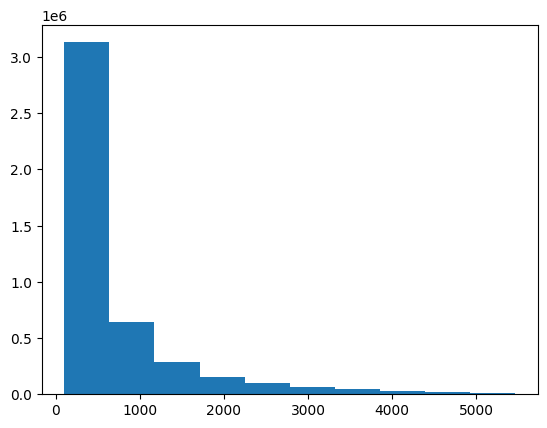

In [32]:
plt.hist(missing_count[:]);

# Computing Allele count at each site



In [27]:
%%time
m, num_alleles = root["variant_allele"].shape
gt_array = root["call_genotype"]
allele_count = zarr.zeros(shape=(m, num_alleles + 1), chunks=gt_array.chunks[0], dtype=int)
n_chunks = gt_array.cdata_shape[0]

def compute(v_chunk):
    G = gt_array.blocks[v_chunk].squeeze(axis=2)
    A = np.zeros((G.shape[0], allele_count.shape[1]), dtype=int)
    # Map missing data to extra allele
    G[G == -1] = num_alleles
    for j, genotypes in enumerate(G):
        A[j] = np.bincount(genotypes, minlength=num_alleles)
    return A

# We get less parallelism here because function does iterating in Python. Certainly
# better ways to do this.

with cf.ThreadPoolExecutor(8) as exec:
    futures = {exec.submit(compute, v_chunk): v_chunk for v_chunk in range(n_chunks)}
    for future in tqdm(cf.as_completed(futures), total=n_chunks):
        v_chunk = futures[future]
        allele_count.blocks[v_chunk] = future.result()

  0%|          | 0/300 [00:00<?, ?it/s]

CPU times: user 14min 28s, sys: 6min 21s, total: 20min 50s
Wall time: 4min 19s


In [28]:
allele_count

<zarr.core.Array (29903, 17) int64>

In [29]:
has_missing = 0
more_than_one_allele = 0
for j in range(allele_count.shape[0]):
    has_missing += allele_count[j, -1] != 0
    more_than_one_allele += np.sum(allele_count[j, :-1] != 0) > 1
has_missing, more_than_one_allele

(29903, 29733)

In [30]:
29733 / 29903

0.9943149516770893

## Get a single sample's haplotype

In [34]:
%%time
k = 1_000_000
h = gt_array[:, k].squeeze(axis=1).T

CPU times: user 326 ms, sys: 2.92 ms, total: 328 ms
Wall time: 327 ms


In [49]:
SEQNAME = root["sample_id"][k]
SEQNAME

'SRR15984815'

## Get genotypes for a single site


In [38]:
%%time
j = gt_array.shape[0] // 2
g = gt_array[j].squeeze(axis=1).T

CPU times: user 483 ms, sys: 0 ns, total: 483 ms
Wall time: 482 ms


# Fetching single alignment from FASTA

The sequence we're looking for is in batch 19:

In [51]:
!grep {SEQNAME} {DATA_WORK_DIR}/batch1.extracted/index.tsv

SRR15984815	19


In [56]:
path = f"{DATA_WORK_DIR}/batch1.aln/19.aln"
path

'viridian_data/alignments/data/batch1.aln/19.aln'

In [64]:
import pyfaidx

reader =  pyfaidx.Fasta(path)

In [60]:
reader[SEQNAME][0:100]

>SRR15984815:1-100
--------------------------------------nnnnnnnnnnnnnnnnagatctgttctctaaacgaactttaaaatctgtgtggctgtcactc

In [67]:
%%time
a = reader[SEQNAME][:]

CPU times: user 2.01 ms, sys: 0 ns, total: 2.01 ms
Wall time: 1.37 ms


In [69]:
reader =  pyfaidx.Fasta(path + ".bgz")

In [70]:
reader

Fasta("viridian_data/alignments/data/batch1.aln/19.aln.bgz")

In [73]:
%%time
a = reader[SEQNAME][:]

CPU times: user 155 µs, sys: 55 µs, total: 210 µs
Wall time: 219 µs


pyfaidx is fast, getting a single sequence from the FASTA quite a lot faster than the Zarr here.

## Pysam

In [75]:
import pysam

ff = pysam.FastaFile(path)
ff

In [78]:
%%time
s = ff.fetch(SEQNAME)

CPU times: user 654 µs, sys: 62 µs, total: 716 µs
Wall time: 371 µs


In [79]:
ff = pysam.FastaFile(path + ".bgz")
ff

In [80]:
%%time
s = ff.fetch(SEQNAME)

CPU times: user 2.37 ms, sys: 0 ns, total: 2.37 ms
Wall time: 1.11 ms
